ADAM NOWAK - Advanced notebook - classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
from sklearn.linear_model import LogisticRegression

def remove_punctuation(text):
    import string
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

baby_df = pd.read_csv('amazon_baby.csv')
baby_df.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


In [3]:
#clearing data
baby_df['review'] = baby_df['review'].astype(str).apply(remove_punctuation)
baby_df['review'] = baby_df["review"].fillna("")

### Logistic regression:  
is used to classify observations into different categories (in our case 2). Simple approach to solve classification problems. 


In [4]:
#preparing data for logistic regression 
baby_df = baby_df[baby_df["rating"] != 3]
baby_df["new_rating"] = baby_df["rating"]

baby_df.loc[baby_df["new_rating"] <= 2, 'new_rating'] = 0
baby_df.loc[baby_df["new_rating"] > 3, 'new_rating'] = 1

In [166]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

logistic_regr_data = baby_df.head(5000) #choosing first 5000 reviews 
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(logistic_regr_data['review'].values)  
Y = logistic_regr_data['new_rating'].values  

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#class_wight='balance' - is the compromise. Automatically adjusts the weights of the classes inversely proportional to their frequency in the dataset.
#better ability to handle imbalanced dataset. 
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.855
              precision    recall  f1-score   support

           0       0.61      0.80      0.69       201
           1       0.95      0.87      0.91       799

    accuracy                           0.85      1000
   macro avg       0.78      0.83      0.80      1000
weighted avg       0.88      0.85      0.86      1000



1. Accuracy model is around 85%, which is pretty good, considering small dataset. 
2. Class '0' means that rating is under 3, class '1' means that rating is over 3. Precision is the number of correct predictions. So how many cases selected to each class should really be there. (ile pozytywych przypadków przez model rzeczywiscie było pozytywne)
3. Recall (czułość) - how precisely model detects every positive and negative cases in the dateset. (ile przypadków z danej klasy z całego zbioru zostało pozytywnie przydzielone do danego zbioru). 
4.  F1-score is the standard of the model. So what's the quality of the model. It's the balance between precision and recall. 


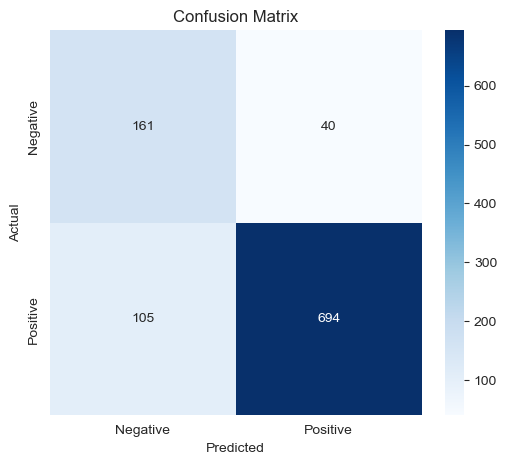

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

#Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

This matrix is used to understand the performance of the model. 
1. True Positive (TP): The number of correctly predicted positive instances.
2. False Positive (FP): The number of incorrectly predicted positive instances.
3. True Negative (TN): The number of correctly predicted negative instances.
4. False Negative (FN): The number of incorrectly predicted negative instances.

As we can observe this model is really accurate in predicting positive cases. 

In [9]:
coeficients = model.coef_[0]
feature_names = vectorizer.get_feature_names_out()

#sorting and zipping coef with names (result = list of tuples) and reversing to displaying most positive ones 
#lambda function specifies sorting key with in this case is the coefficients value for specific word
most_positive = sorted(zip(coeficients, feature_names), key=lambda x: x[0], reverse=True)
print("Top 10 Most Positive Words:")
for n,c in most_positive[:10]:
    print(f"{n}: {c}")

print()
#sorting and zipping coef with names and displaying most negative ones
most_negative = sorted(zip(coeficients, feature_names), key=lambda x: x[0], reverse= False)
print("Top 10 Most Negatice Words:")
for n,c in most_negative[:10]:
    print(f"{n}: {c}")

Top 10 Most Positive Words:
4.77124881115596: easy
4.750512366190522: love
4.560484531026322: great
3.0183147984813465: perfect
2.7306761950625997: works
2.573692984818313: best
2.5393938809658616: highly
2.405397113601772: loves
2.0323141553965125: well
1.9458933615223435: can

Top 10 Most Negatice Words:
-4.162818846126846: not
-3.6336136259599994: money
-3.163039107979288: waste
-2.7194860016083284: thought
-2.6476903066928097: disappointed
-2.3861900369023146: would
-2.258658205424442: leak
-2.23461696158289: idea
-2.039611260629074: however
-2.028577482987277: returned


We can observe that some word are more neutral than negative like: 'can' or 'however', but they are considered by the model as positive or negative one. 

In [18]:
model_test1 = LogisticRegression(C=3,solver='lbfgs', class_weight='balanced')
model_test1.fit(X_train, y_train)
y_pred_test1 = model_test1.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_test1))
print(classification_report(y_test, y_pred_test1))

model_test2 = LogisticRegression(C=0.3,solver='lbfgs', class_weight='balanced')
model_test2.fit(X_train, y_train)
y_pred_test2 = model_test2.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_test2))
print(classification_report(y_test, y_pred_test2))

Accuracy: 0.865
              precision    recall  f1-score   support

           0       0.64      0.77      0.70       201
           1       0.94      0.89      0.91       799

    accuracy                           0.86      1000
   macro avg       0.79      0.83      0.80      1000
weighted avg       0.88      0.86      0.87      1000

Accuracy: 0.823
              precision    recall  f1-score   support

           0       0.54      0.79      0.64       201
           1       0.94      0.83      0.88       799

    accuracy                           0.82      1000
   macro avg       0.74      0.81      0.76      1000
weighted avg       0.86      0.82      0.83      1000



solder=lbfgs is a gradient-based optimizer.

C is the $\lambda$ - which controls the model complexity. 

Small C value => stronger regularization. (simpler model - less likely to overfit, but more likely to underfit).
 
BiG C value => weaker regularization. 

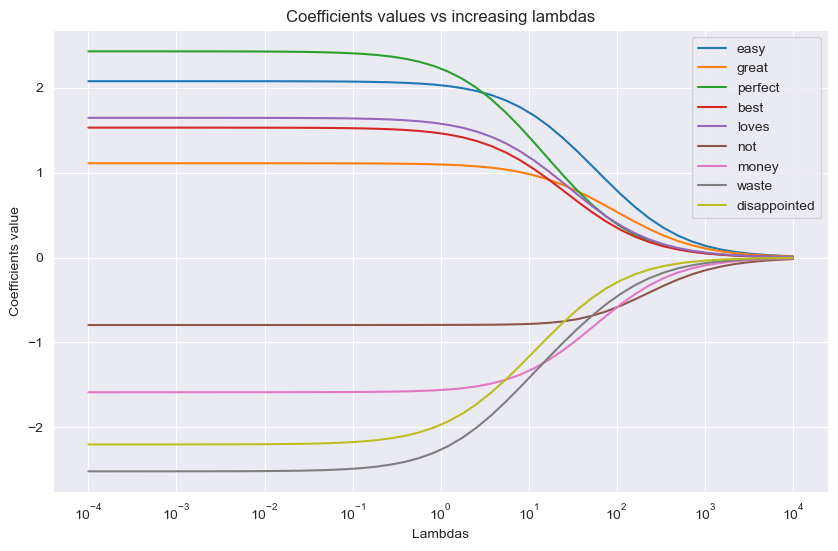

In [31]:
selected_words = ['easy', 'great', 'perfect', 'best', 'loves', 'not', 'money', 'waste', 'disappointed']
vectorizer = TfidfVectorizer(vocabulary=selected_words)
feature_names = vectorizer.get_feature_names_out()
selected_indexes = np.where(np.isin(feature_names, selected_words))[0] #[0] is to get only index not values 

X = vectorizer.fit_transform(logistic_regr_data['review'].values)  
Y = logistic_regr_data['new_rating'].values  

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

coefficients = []
lambdas = np.logspace(-4, 4, base=10) #lambda from 10^-4 to 10^4

for lambd in lambdas:
    model = LogisticRegression(C=1/lambd, solver='liblinear', class_weight='balanced')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    coef = model.coef_[0]
    coefficients.append(coef[selected_indexes])  
    
coefficients = np.array(coefficients)
plt.figure(figsize=(10, 6))
for i, word in enumerate(selected_words):
    plt.plot(lambdas, coefficients[:, i], label=word)

plt.xscale('log')
plt.xlabel("Lambdas")
plt.ylabel("Coefficients value")
plt.title("Coefficients values vs increasing lambdas")
plt.legend()

plt.show() 


This plot shows how important it is to choose right $\lambda$. We can observe how different coefficients values changes with increasing $\lambda$. 
As we can see small $\lambda$ values means lower regularisation, what indicates bigger coefficients values, which is more like to overfit, but also better for classification. 

big $\lambda$ means higher regularisation, what indicates coefficients values are closer to 0, which decrease chances of overloading the model, so the overfitting is less probable to happen. 

Choosing right $\lambda$ is important to create a balance between overfitting and underfitting. 

# TITANIC dataset
Prepared for decision tree learning. 

In [44]:
titanic_df = pd.read_csv('Titanic-Dataset.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Embarked means: Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton. 

SibSp: No. of siblings / spouses aboard the Titanic. 

In [45]:
titanic_df = titanic_df.dropna(subset=['Age'])
print(len(titanic_df))

titanic_df['Sex'] = titanic_df['Sex'].map({'male': 1, 'female': 0}) 

num_titanic_df = titanic_df[['Survived', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare']]
correlation_matrix = num_titanic_df.corr()
print(correlation_matrix)

714
          Survived       Age       Sex     SibSp     Parch      Fare
Survived  1.000000 -0.077221 -0.538826 -0.017358  0.093317  0.268189
Age      -0.077221  1.000000  0.093254 -0.308247 -0.189119  0.096067
Sex      -0.538826  0.093254  1.000000 -0.103950 -0.246972 -0.184994
SibSp    -0.017358 -0.308247 -0.103950  1.000000  0.383820  0.138329
Parch     0.093317 -0.189119 -0.246972  0.383820  1.000000  0.205119
Fare      0.268189  0.096067 -0.184994  0.138329  0.205119  1.000000


What we can understand from this correlation matrix: 
1. Higher ticket price => lower chance to die. 
2. Sex => Women were more likely to survive.
3. Age => younger person bigger chance to survive.

In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

X = titanic_df[['Age', 'Sex', 'SibSp', 'Parch', 'Fare']]  
y = titanic_df['Survived']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
clf = DecisionTreeClassifier(max_depth=4)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.7877094972067039


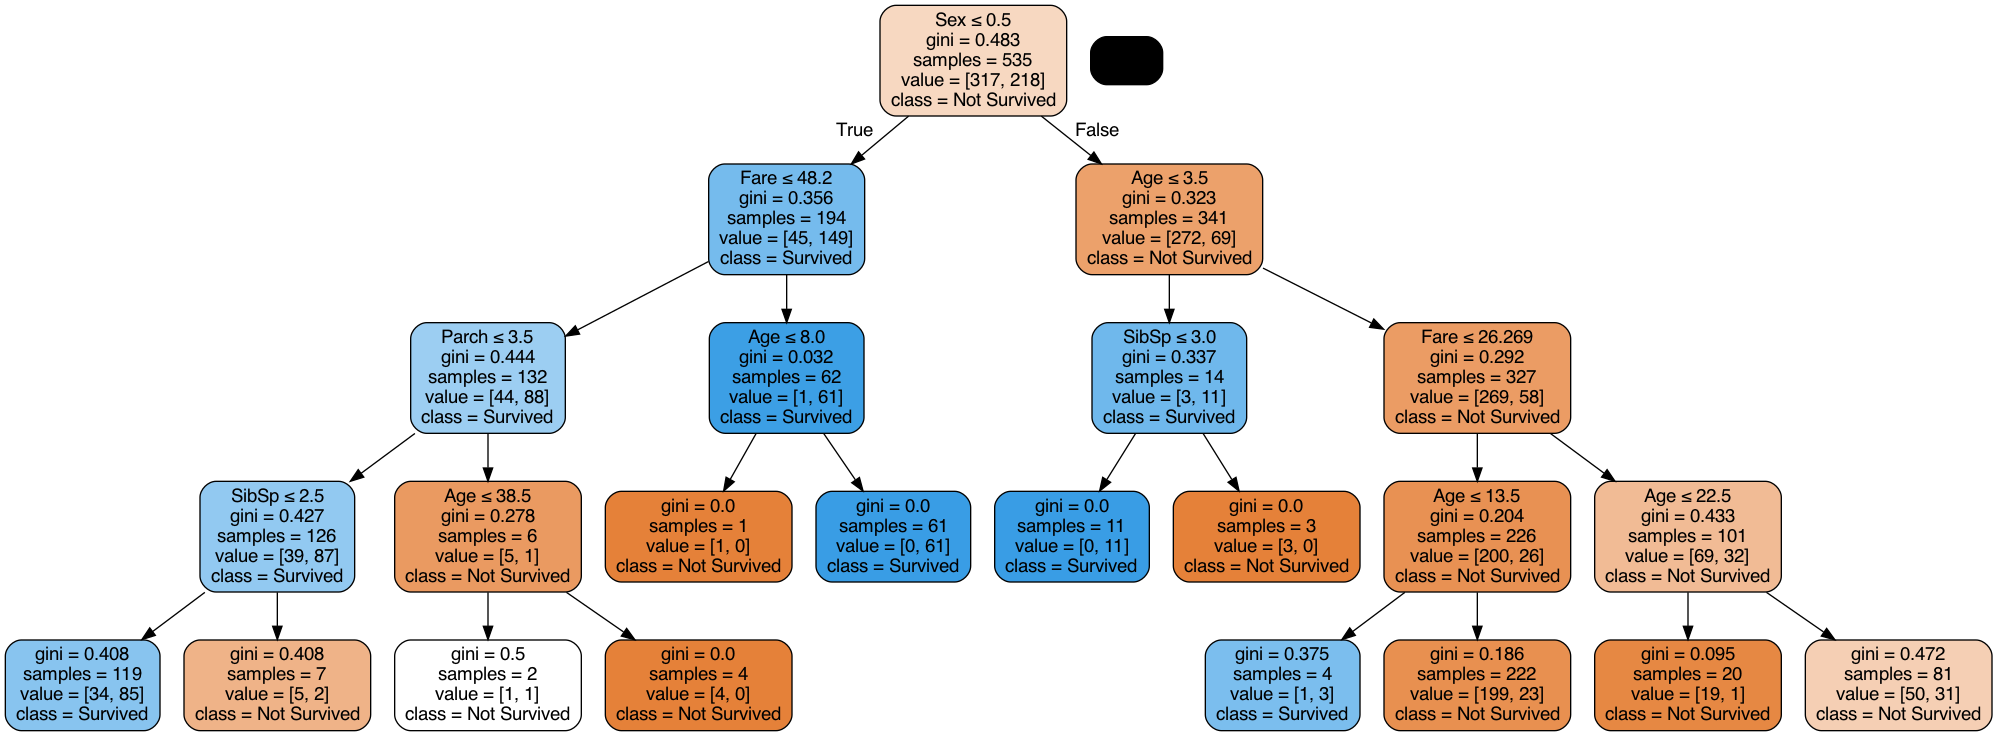

In [93]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                feature_names=X.columns, class_names=['Not Survived', 'Survived'],
                filled=True,            #adding color to nodes
                rounded=True,
                special_characters=True)      
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('titanic.png')
Image(graph.create_png())

Gini is the feature in the decision tree to measure the homogeneity (jednorodność) of the NODE. 

In our case, model chooses the feature which splits data in the most effective way to each class. 
On the plot above, we cna notice that the first feature used for splitting was Sex, then Fare and Age. 
The end of the decision tree classification is determined by the 'max_depth' or when all of the values are in one class (in this case 'Not Survived' or 'Survived'. 

The difference between criterion="entropy" and default 'gini' is that small that I picked the basic one. 

In [94]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, KFold

num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
cross_val_results = cross_val_score(clf, X, y, cv=kf)

print(f'Accuracy: {cross_val_results}')
print(f'Mean Accuracy: {np.mean(cross_val_results)}')


Accuracy: [0.78321678 0.76223776 0.81818182 0.86713287 0.78873239]
Mean Accuracy: 0.8039003250270855


Cross validation is used to check the stability of the model. 

X data is divided into 5 sections (folds), where one is used for testing, the rest for training. 
1. We can observe that fold=5 as the testing part performs the best. 
2. We can see also that model is sensitive on the data fracture - some folds perform a bit better than the other. 

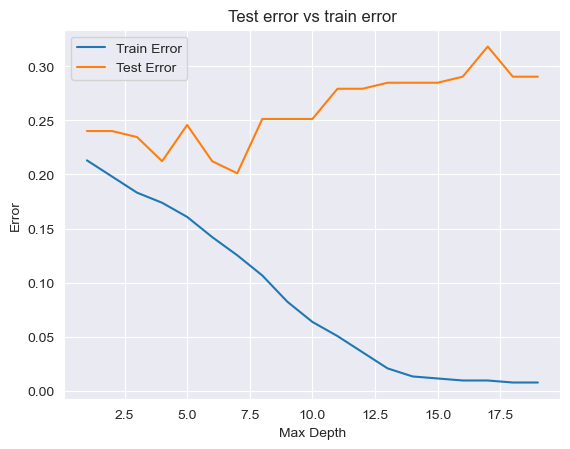

In [95]:
#testing error difference depending on maxdepth. 
train_errors = []
test_errors = []

for i in range(1, 20):
    clf2 = DecisionTreeClassifier(max_depth=i)
    clf2 = clf2.fit(X_train, y_train)
    y_train_pred2 = clf2.predict(X_train)
    y_test_pred2 = clf2.predict(X_test)
    
    train_error = 1 - accuracy_score(y_train, y_train_pred2)
    test_error = 1 - accuracy_score(y_test, y_test_pred2)
    
    train_errors.append(train_error)
    test_errors.append(test_error)

plt.plot(range(1, 20), train_errors, label='Train Error') 
plt.plot(range(1, 20), test_errors, label='Test Error')
plt.xlabel('Max Depth')
plt.ylabel('Error')
plt.title('Test error vs train error')
plt.legend()
plt.show()


From this plot we can see that every model with max depth variable higher than 8 is the perfect example of overfitting, where train error is small and test error is high. 

So we can notice that model with tree depth around 5 will perform the best, so the example above is well-fitted model. 

Conclusion: simpler model is better. 


# AdaBoost
AdaBoost - it's a boosting technique using iteration, where model learn on the mistakes of previous ones. AdaBoost is based on creating a sequence of weak classifiers, where each subsequent model attempts to correct the errors made by the previous ones.

In [158]:
#adaboost formula
from sklearn.ensemble import AdaBoostClassifier

base_estimator = DecisionTreeClassifier(max_depth=1)
#n_estimators is the number of weak classifiers. 
ada_clf = AdaBoostClassifier(base_estimator, n_estimators=50, algorithm='SAMME')
ada_clf = ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.776536312849162


Accuracy: 0.776536312849162 - when base_estimator depth is 1.

Accuracy: 0.7988826815642458 - when base_estimator depth is 3. - a bit better. 


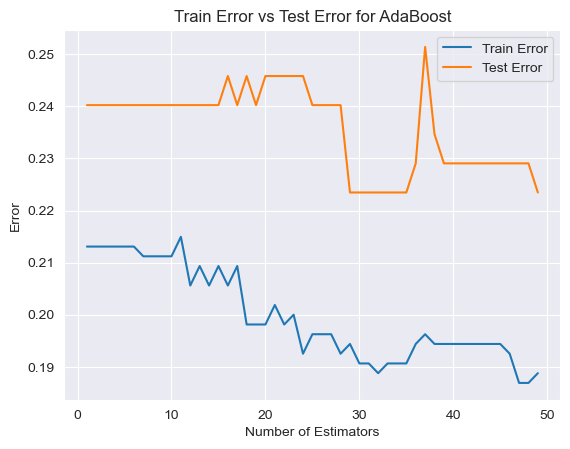

In [159]:
ada_clf = AdaBoostClassifier(base_estimator, n_estimators=1, algorithm='SAMME')

train_error_ada = []
test_error_ada = []

for i in range(1, 50):
    ada_clf.set_params(n_estimators=i)
    ada_clf.fit(X_train, y_train)
    
    #error on training data
    y_train_ada_pred = ada_clf.predict(X_train)
    train_error = 1 - accuracy_score(y_train, y_train_ada_pred)
    train_error_ada.append(train_error)
    
    #error on testing data 
    y_test_ada_pred = ada_clf.predict(X_test)
    test_error = 1 - accuracy_score(y_test, y_test_ada_pred)
    test_error_ada.append(test_error)

plt.plot(range(1, 50), train_error_ada, label='Train Error') 
plt.plot(range(1, 50), test_error_ada, label='Test Error')
plt.xlabel('Number of Estimators')
plt.ylabel('Error')
plt.title('Train Error vs Test Error for AdaBoost')
plt.legend()
plt.show()
    

We can notice that in comparison with the first model, where I manually increase tree depth, here more iteration resulted in better model performance. Overfitting problem didn't appear here. 

# Random forest 

Is the machine learning algorithm used for classification and regression using decision trees. This technique helps to minimise overfitting. Random forest create a set of decision trees from randomly selected subset of data, and then It collects the votes from different decision trees to decide the final prediction.


In [139]:
from sklearn.ensemble import RandomForestClassifier
X = titanic_df[['Age', 'Sex', 'SibSp', 'Parch', 'Fare']]  
y = titanic_df['Survived']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rf = RandomForestClassifier(n_estimators=50)
rf = rf.fit(X_train, y_train)
y_rf_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_rf_pred))


Accuracy: 0.770949720670391


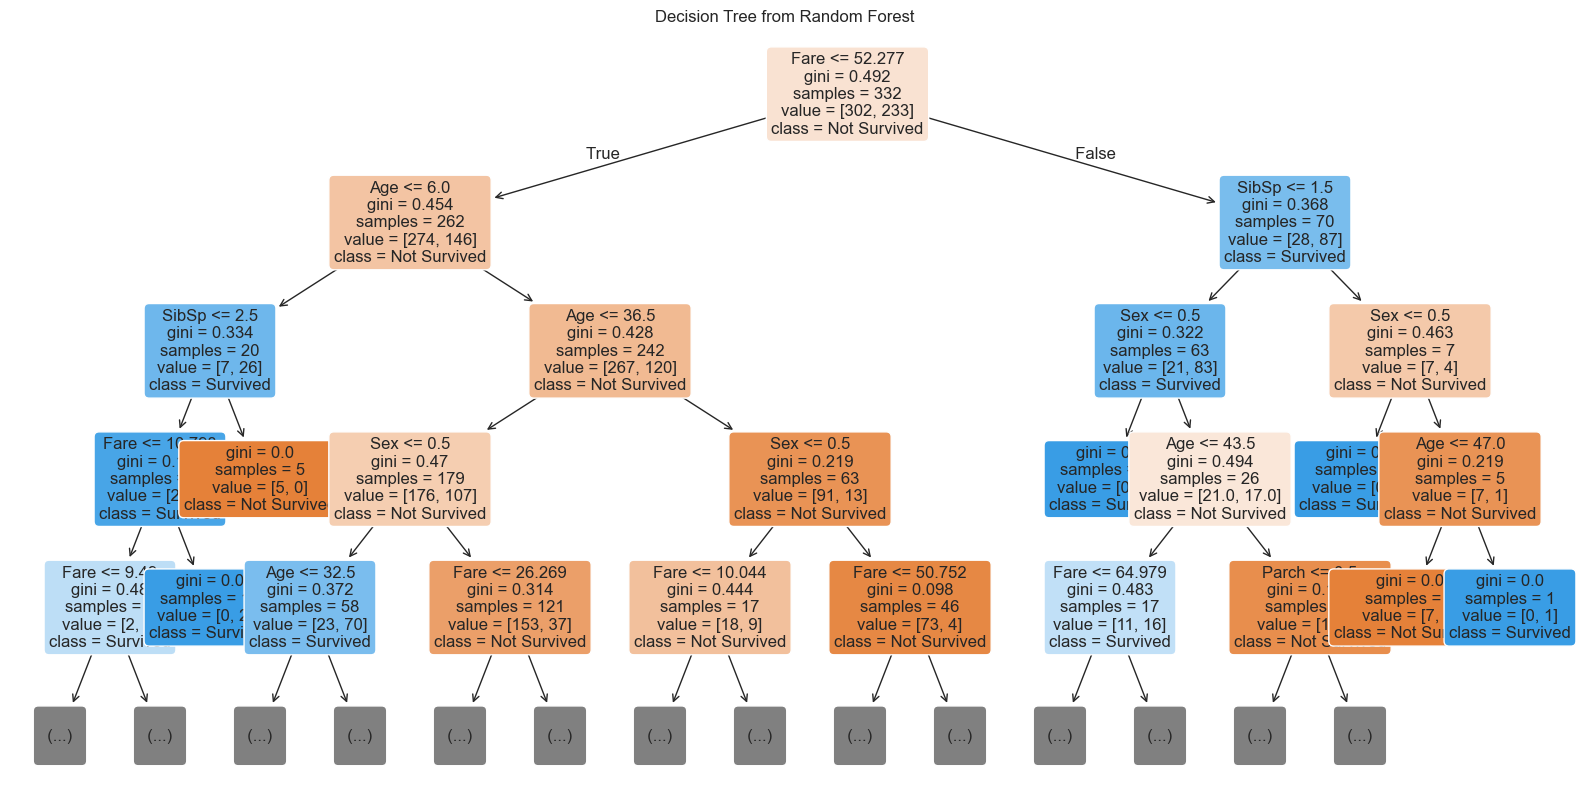

In [147]:
tree = rf.estimators_[0] 

plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'], rounded=True, fontsize=12, max_depth=4)
plt.title('Decision Tree from Random Forest')
plt.show()

This tree useless because model is based on the whole set of tree and this is just a simple one. 

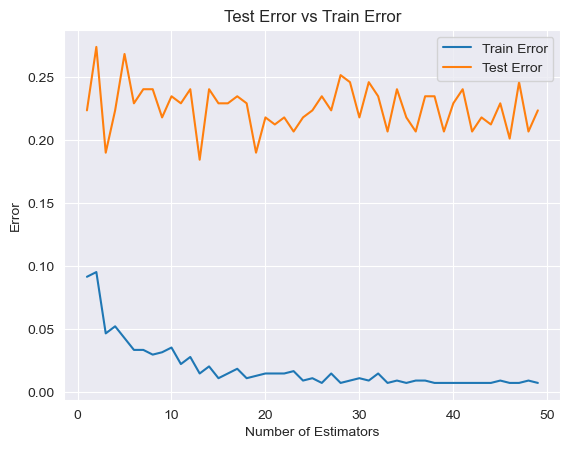

In [155]:
#random forest error
rf = RandomForestClassifier(n_estimators=1)
train_error_rf = []
test_error_rf = []

for i in range(1, 50):
    rf.set_params(n_estimators=i)
    rf.fit(X_train, y_train)
    
    y_train_rf_pred = rf.predict(X_train)
    train_error = 1 - accuracy_score(y_train, y_train_rf_pred)
    train_error_rf.append(train_error)
    
    y_test_rf_pred = rf.predict(X_test)
    test_error = 1 - accuracy_score(y_test, y_test_rf_pred)
    test_error_rf.append(test_error)

plt.plot(range(1, 50), train_error_rf, label='Train Error')
plt.plot(range(1, 50), test_error_rf, label='Test Error')
plt.title('Test Error vs Train Error')
plt.xlabel('Number of Estimators')
plt.ylabel('Error')
plt.legend()
plt.show()

This technique is also resistance to overfitting as we can notice above. 